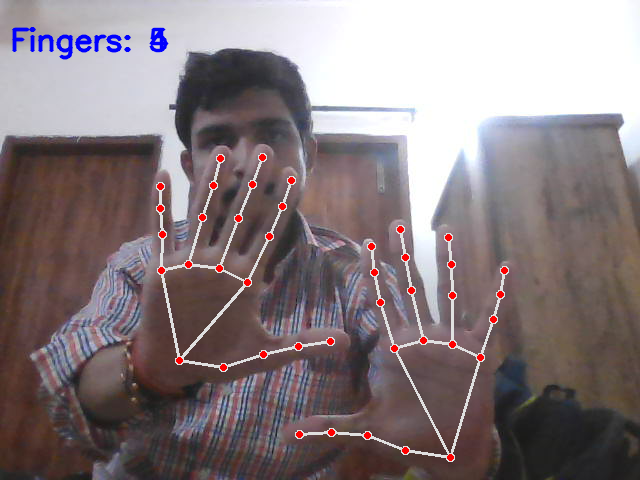

In [6]:
import cv2
import mediapipe as mp
import numpy as np
from IPython.display import display, Image, clear_output
import PIL.Image
import io

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7)

def count_fingers(hand_landmarks):
    fingers = []
    # Thumb
    if hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x < hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x:
        fingers.append(1)
    else:
        fingers.append(0)

    # 4 Fingers
    for lm_index in range(1, 5):
        if hand_landmarks.landmark[mp_hands.HandLandmark(lm_index * 4)].y < hand_landmarks.landmark[mp_hands.HandLandmark(lm_index * 4 - 2)].y:
            fingers.append(1)
        else:
            fingers.append(0)
    
    return fingers.count(1)

def capture_frame():
    # Open the webcam
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return None

    # Capture one frame
    ret, frame = cap.read()
    cap.release()  # Release the webcam

    if not ret:
        print("Error: Could not read frame.")
        return None

    return frame

def show_image_in_notebook(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pil_img = PIL.Image.fromarray(img_rgb)
    with io.BytesIO() as f:
        pil_img.save(f, format='PNG')
        display(Image(data=f.getvalue()))

def process_frames(num_frames=10):
    for _ in range(num_frames):
        # Capture frame
        img = capture_frame()
        if img is None:
            break

        # Convert to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Process the image
        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw landmarks
                mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                # Count fingers
                finger_count = count_fingers(hand_landmarks)
                # Display number of fingers
                cv2.putText(img, f'Fingers: {finger_count}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Display image
        clear_output(wait=True)  # Clear the previous output
        show_image_in_notebook(img)  # Display the image in the notebook

# Process a limited number of frames
process_frames(num_frames=10)


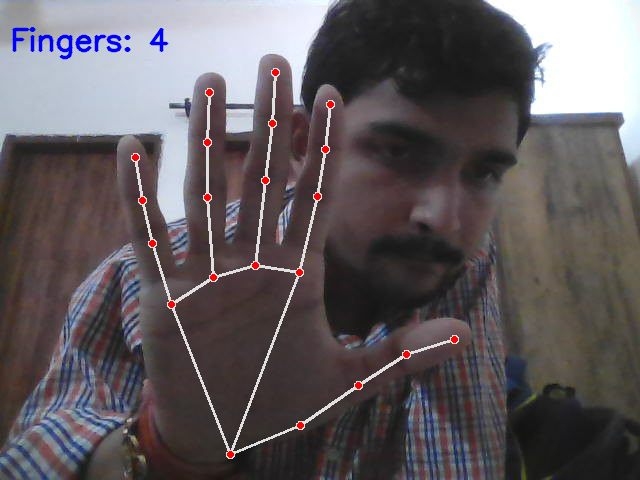

Processed 10 frames and saved to 'output_images'.


In [7]:
import cv2
import mediapipe as mp
import numpy as np
from IPython.display import display, Image, clear_output
import PIL.Image
import io
import os

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7)

def count_fingers(hand_landmarks):
    fingers = []
    # Thumb
    if hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x < hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x:
        fingers.append(1)
    else:
        fingers.append(0)

    # 4 Fingers
    for lm_index in range(1, 5):
        if hand_landmarks.landmark[mp_hands.HandLandmark(lm_index * 4)].y < hand_landmarks.landmark[mp_hands.HandLandmark(lm_index * 4 - 2)].y:
            fingers.append(1)
        else:
            fingers.append(0)
    
    return fingers.count(1)

def capture_frame():
    # Open the webcam
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return None

    # Capture one frame
    ret, frame = cap.read()
    cap.release()  # Release the webcam

    if not ret:
        print("Error: Could not read frame.")
        return None

    return frame

def show_image_in_notebook(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pil_img = PIL.Image.fromarray(img_rgb)
    with io.BytesIO() as f:
        pil_img.save(f, format='PNG')
        display(Image(data=f.getvalue()))

def process_frames(num_frames=10, output_dir='output_images'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for frame_idx in range(num_frames):
        # Capture frame
        img = capture_frame()
        if img is None:
            break

        # Convert to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Process the image
        results = hands.process(img_rgb)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw landmarks
                mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                # Count fingers
                finger_count = count_fingers(hand_landmarks)
                # Print number of fingers
                print(f'Frame {frame_idx + 1}: Fingers detected: {finger_count}')
                # Display number of fingers
                cv2.putText(img, f'Fingers: {finger_count}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

        # Save the image
        output_file = os.path.join(output_dir, f'frame_{frame_idx + 1}.png')
        cv2.imwrite(output_file, img)

        # Display image
        clear_output(wait=True)  # Clear the previous output
        show_image_in_notebook(img)  # Display the image in the notebook

    print(f"Processed {num_frames} frames and saved to '{output_dir}'.")

# Process a limited number of frames
process_frames(num_frames=10)
